## Задачи для самостоятельного решения
***

**1. Построить в одном графическом окне:  
- линейный график функции $y = sin(x)$.  
- точечный график функции $y = cos(x)$.  

Аргумент функции (ось x) задается в градусах, интервал [-180,180].  
Область графика должна името название, легенду, сетку, подписи осей.  
Графики должны иметь разный цвет и вид маркера.

In [ ]:
#Моисеев Денис КИ21-06Б, 032161258

### Исходные данные
Текстовый файл data.txt, в котором находится отчет по продажам за месяц по трем позициям: хлеб, икра, пиво.  
Формат данных:
В первой строке файла - слово "day" и номера дней месяца по порядку (1-30).  
В трех следующих строках - название позиции на английском и выручка за каждый день.
### Порядок работы
#### 1. Открыть файл и считать данные

In [52]:
with open('data.txt', 'r') as f:
    f = f.read().splitlines()
    days = f[0].split()
    days.pop(0)

    f.pop(0)
    
    tovar = [i.split() for i in f]
    
    data = {}
    
for i in tovar:
    t = i
    data[t[0]] = []
    name = t[0]
    t.pop(0)
    for ii in range(0,len(t)):
        data[name].append([days[ii] ,t[ii]])
    



print(data)


{'bread': [['1', '18'], ['2', '27'], ['3', '29'], ['4', '17'], ['5', '12'], ['6', '15'], ['7', '13'], ['8', '30'], ['9', '18'], ['10', '11'], ['11', '15'], ['12', '11'], ['13', '27'], ['14', '11'], ['15', '14'], ['16', '24'], ['17', '12'], ['18', '9'], ['19', '22'], ['20', '15'], ['21', '35'], ['22', '24'], ['23', '19'], ['24', '12'], ['25', '19'], ['26', '24'], ['27', '26'], ['28', '31'], ['29', '17'], ['30', '23']], 'caviar': [['1', '3'], ['2', '2'], ['3', '1'], ['4', '48'], ['5', '45'], ['6', '27'], ['7', '2'], ['8', '3'], ['9', '3'], ['10', '5'], ['11', '1'], ['12', '3'], ['13', '5'], ['14', '15'], ['15', '4'], ['16', '1'], ['17', '0'], ['18', '1'], ['19', '2'], ['20', '1'], ['21', '0'], ['22', '0'], ['23', '0'], ['24', '2'], ['25', '1'], ['26', '2'], ['27', '0'], ['28', '0'], ['29', '1'], ['30', '0']], 'beer': [['1', '2'], ['2', '2'], ['3', '2'], ['4', '2'], ['5', '3'], ['6', '8'], ['7', '6'], ['8', '4'], ['9', '2'], ['10', '0'], ['11', '3'], ['12', '3'], ['13', '10'], ['14', '5']

#### 2. Построить в одном окне график продаж по каждой из трех позиций за месяц   

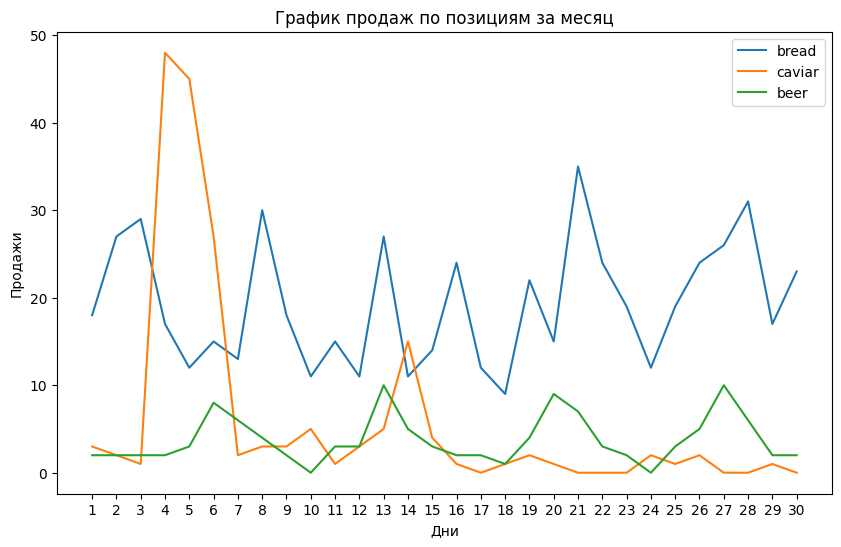

In [53]:
import matplotlib.pyplot as plt


sales_data = {}
for name, sales in data.items():
    sales_data[name] = [int(sale[1]) for sale in sales]


plt.figure(figsize=(10, 6))


for name, sales in sales_data.items():
    plt.plot(days, sales, label=name)


plt.xlabel("Дни")
plt.ylabel("Продажи")
plt.title("График продаж по позициям за месяц")
plt.legend()

# Показать график
plt.show()



#### 3. Построить круговую диаграмму, ображающую, какую долю дохода за месяц составляет каждая позиция.

[['bread', 580], ['caviar', 178], ['beer', 113]]


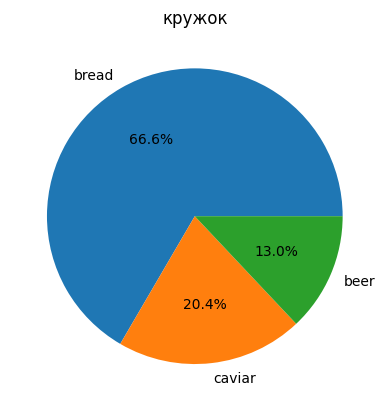

In [62]:
import matplotlib.pyplot as plt
with open('data.txt', 'r') as f:
    f = f.read().splitlines()
    days = f[0].split()
    days.pop(0)

    f.pop(0)
    
    tovar = [i.split() for i in f]
    
    data = {}
    
for i in tovar:
    t = i
    data[t[0]] = []
    name = t[0]
    t.pop(0)
    for ii in range(0,len(t)):
        data[name].append([days[ii] ,t[ii]])
t = []
for i in data:
    #t.append([i,[ii[1] for ii in data[i]]])
    t.append([i,sum([int(ii[1]) for ii in data[i]])])
    
print(t)


def create_pie_chart(data):
    # Extract the names and values from the data
    names, values = zip(*data)

    # Create the pie chart
    plt.pie(values, labels=names, autopct='%1.1f%%')
    plt.title('кружок')
    plt.show()



create_pie_chart(t)


#### 4. Вывести на консоль следующую информацию:
- максимальную и минимальную выручку за месяц с указанием даты и дня недели;
- среднюю выручку в день

In [71]:
with open('data.txt', 'r') as f:
    f = f.read().splitlines()
days = f[0].split()
days.pop(0)

f.pop(0)

tovar = [i.split() for i in f]

data = {}

for i in tovar:
    t = i
    data[t[0]] = []
    name = t[0]
    t.pop(0)
    for ii in range(0, len(t)):
        data[name].append([days[ii], t[ii]])

# Функция для получения максимальной и минимальной выручки
def get_max_min_revenue(data):
    max_revenue = 0
    max_date = ""
    min_revenue = float('inf')
    min_date = ""

    for product, sales in data.items():
        
        for sale in sales:
            revenue = int(sale[1])
            date = sale[0]

            if revenue > max_revenue:
                max_p = product
                max_revenue = revenue
                max_date = date

            if revenue < min_revenue:
                min_p = product
                min_revenue = revenue
                min_date = date

    return max_revenue, max_date,max_p, min_revenue, min_date , min_p

# Функция для получения средней выручки в день
def get_avg_revenue(data):
    total_revenue = 0
    total_days = 0

    for product, sales in data.items():
        for sale in sales:
            revenue = int(sale[1])
            total_revenue += revenue
            total_days += 1

    avg_revenue = total_revenue / total_days

    return avg_revenue
# Получаем максимальную и минимальную выручку
max_revenue, max_date,max_p, min_revenue, min_date , min_p = get_max_min_revenue(data)

# Получаем среднюю выручку в день
avg_revenue = get_avg_revenue(data)

# Выводим информацию на консоль
print("Максимальная выручка:", max_revenue, "Дата:", max_date , "товар",max_p)
print("Минимальная выручка:", min_revenue, "Дата:", min_date ,"товар",min_p)
print("Средняя выручка в день:", avg_revenue)

Максимальная выручка: 48 Дата: 4 товар caviar
Минимальная выручка: 0 Дата: 17 товар caviar
Средняя выручка в день: 9.677777777777777
